# Statistics basics
## Central Limit Theorem with pandas

Let us recall Central Limit Theorem. It says the following. Let $(x_1, \ldots, x_n)$ be an i.i.d. sample from some random variable $X$ with finite variance. Then sample mean $\bar x$ is distributed approximately with normal law. More exact, let us consider z-score:

$$z=\frac{\bar x - \mathbb EX}{\mathop{\mathrm{SD}}(X)}\sqrt{n}$$

As one can see, z-score is shifted and rescaled version of $\bar x$. In the numerator, we shift $\bar x$ by $\mathbb EX$ to achieve zero expected value. After that we divide it by standard error of mean $\mathop{\mathrm{SD}}(X)/\sqrt{n}$, which is standard deviation of sample average.

Theorem says that the distribution of z-score tends to the standard normal distribution.

We already made simulations that illustrate this theorem in the course of Probability. But now we can do it more effectively thanks to pandas.

## The old way
Let us recall how we did our simulations previously.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import pandas as pd

%matplotlib inline

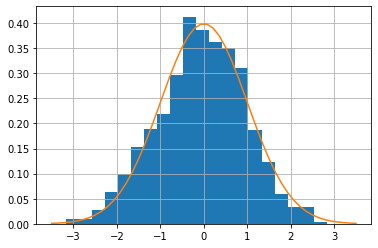

In [2]:
def the_old_way(number_of_samples, sample_size, plot=True):

    means = []
    zscores = []

    EX = 0.5
    VarX = 1. / 12
    # Expected value and variance of our initial distribution
    # Now use are using uniform distribution

    for i in range(number_of_samples):
        sample = np.random.uniform(low=0, high=1, 
                                   size=sample_size)
        # create new sample

        mean = sum(sample) / len(sample)
        # find its mean

        zscore = (mean - EX) * np.sqrt(sample_size) / np.sqrt(VarX)
        # find its z-score

        means.append(mean)
        zscores.append(zscore)
        # save everything

    if plot:
        xrange = np.linspace(-3.5, 3.5)
        plt.hist(zscores, density=True, bins=20)
        plt.plot(xrange, scipy.stats.norm.pdf(xrange))
        plt.grid()

the_old_way(1000, 100)

This code can be made simpler and faster. First of all, note that `np.random.uniform` (like other random number generators from *numpy*) can produce not only one-dimensional arrays populated by samples from uniform, but also two- and multidimensional arrays (matrixes and more). You just have to put tuple into `size` argument instead of sample size.

In [3]:
np.random.uniform(low=0, high=1, size=(5, 3))

array([[0.46400382, 0.63226778, 0.5572168 ],
       [0.32936921, 0.94273885, 0.81122005],
       [0.31035353, 0.58821274, 0.63395123],
       [0.81446532, 0.81809731, 0.08397308],
       [0.63470123, 0.36279576, 0.77258747]])

We obtained matrix with 5 rows and 3 columns. One can treat this matrix as a collection of 5 samples, each sample has 3 elements. Thus we can avoid loops.

## Task 1
Write a function `generate_data(number_of_samples, sample_size)` that returns dataframe with `number_of_samples` rows and `sample_size` columns populated by uniformly distributed random variables.

**Note.** No loops allowed!

**Hint.** `pd.DataFrame` can be constructed from the array returned by `np.random.uniform`.

In [4]:
# YOUR CODE HERE

def generate_data(number_of_samples, sample_size):
    
    # generate columns
    col_ = np.arange(1, sample_size + 1, 1)
    
    # return the dataframe
    return pd.DataFrame(np.random.random_sample((number_of_samples, sample_size)), columns=col_)

In [5]:
generate_data(105, 3)

,1,2,3
0,0.016945,0.327948,0.107478
1,0.173913,0.769974,0.915663
2,0.181051,0.914052,0.583054
3,0.272728,0.927423,0.103798
4,0.340425,0.725545,0.832471
...,...,...,...
100,0.260411,0.335159,0.724790
101,0.682589,0.385557,0.072682
102,0.622111,0.773765,0.089752
103,0.540460,0.275267,0.324422


In [6]:
np.abs(generate_data(100000, 10).mean().mean() - 0.5)

9.775370690567886e-05

In [7]:
np.abs(generate_data(100000, 10).var(ddof=1).mean() - 1./12)

5.7908534268319434e-05

In [8]:
assert generate_data(105, 3).shape == (105, 3)
assert np.abs(generate_data(100000, 10).mean().mean() - 0.5) < 0.01
assert np.abs(generate_data(100000, 10).var(ddof=1).mean() - 1./12) < 0.01

## Task 2
Write function `mk_zscores(df, EX, VarX)` that takes dataframe generated by `generate_data` and returns series that contains z-score for each sample (row) of data in `df` using values of `EX` (population mean) and `VarX` (population variance) provided.

**Note.** No loops allowed!

**Hint.** To get number of rows and columns in dataframe, atribute `.shape` may be used.

In [9]:
# YOUR CODE HERE

def mk_zscores(df, EX, VarX):
    
    # transpose the  data to calculate by columns
    df = np.transpose(df)
    
    # find the size of sample
    n = df.shape[0]
    
    # return z_score (X - mu) / (sigma / sqrt(n))    
    return (df.mean() - EX)/(np.sqrt(VarX)/np.sqrt(n))


In [10]:
mk_zscores(pd.DataFrame([[1, 2, 3], [4, 5, 10], [1, 100, 3], [10, 2, 15]]), 
                                          EX=0.5, VarX=1./ 12)

0      9.0
1     35.0
2    205.0
3     51.0
dtype: float64

In [11]:
pd.testing.assert_series_equal(mk_zscores(pd.DataFrame([[1, 2, 3], [4, 5, 10], [1, 100, 3], [10, 2, 15]]), 
                                          EX=0.5, VarX=1./ 12),
                               pd.Series([  9.,  35., 205.,  51.]))

Finally, let us draw the histogram:

In [12]:
def the_new_way(number_of_samples, sample_size, plot=True):
    zscores = mk_zscores(generate_data(number_of_samples, sample_size), EX=0.5, VarX=1./12)
    if plot:
        zscores.hist(density=True, bins=20)
        xrange = np.linspace(-3.5, 3.5)
        plt.plot(xrange, scipy.stats.norm.pdf(xrange))

If everything is correct, old and new pictures should like very similar:

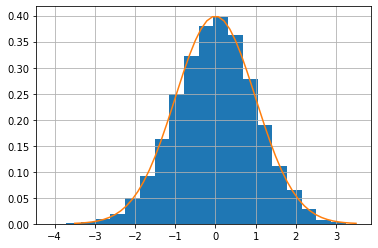

In [13]:
the_new_way(10000, 100)

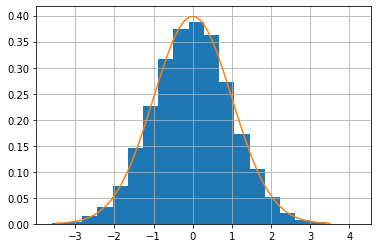

In [14]:
the_old_way(10000, 100)

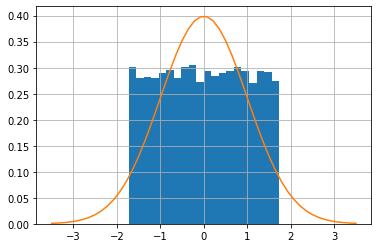

In [15]:
the_new_way(10000, 1)

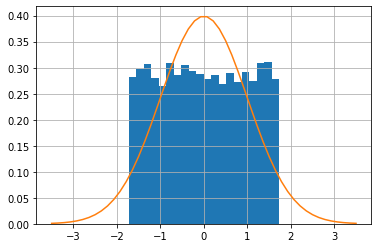

In [16]:
the_old_way(10000, 1)

Let us check the speed.

In [17]:
%%timeit 
the_old_way(10000, 1, plot=False)

75.9 ms ± 1.71 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [18]:
%%timeit 
the_new_way(10000, 1, plot=False)

1.12 ms ± 10.6 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


Pandas is wa-a-ay faster!

That's why we love it!